The <a href="https://www.kaggle.com/c/titanic/"> Titanic challenge</a>  on Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.

I have been playing with the Titanic dataset for a while, and I have recently achieved an accuracy score of 0.8134 on the public leaderboard. As I'm writing this post, I am ranked among the top 9% of all Kagglers. (More than 4540 teams are currently competing)

This post is the opportunity to share my solution with you.

To make this tutorial more "academic" so that everyone could benefit, I will first start with an exploratory data analysis (EDA) then I'll follow with feature engineering and finally present the predictive model I set up.

Throughout this jupyter notebook, I will be using Python at each level of the pipeline.

The main libraries involved in this tutorial are: 

* <b>Pandas</b> for data manipulation
* <b>Matplotlib</b> and <b> seaborn</b> for data visualization
* <b>Numpy</b> for multidimensional array computing
* <b>sklearn</b> for machine learning and predictive modeling

### Installation procedure 

A very easy way to install these packages is to download and install the <a href ="http://conda.pydata.org/docs/install/quick.html#os-x-miniconda-install">Conda</a> distribution that encapsulates them all. This distribution is available on all platforms (Windows, Linux and Mac OSX).

### Nota Bene

This is my first attempt as a blogger and as a machine learning practitioner as well. So if you have any advice or suggestion shoot me an email at ahmed.besbes@hotmail.com.
If you also have a question about the code or the hypotheses I made, do not hesitate to post a comment in the comment section below.

Hope you've got everything set on your computer. Let's get started.

# I -  Exploratory data analysis

In this section, we'll be doing four things. 

- Data extraction : we'll load the dataset and have a first look at it. 
- Cleaning : we'll fill in missing values.
- Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
- Assumptions : we'll formulate hypotheses from the charts.

We import the useful libraries.

In [36]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

Two datasets are available: a training set and a test set.
We'll be using the training set to build our predictive model and the testing set to score it and generate an output file to submit on the Kaggle evaluation system.

We'll see how this procedure is done at the end of this post.

Now let's start by loading the training set.

In [37]:
data = pd.read_csv('../input/train.csv')

Pandas allow you to have a sneak peak at your data.

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead.

The other variables that describe the passengers are:

- PassengerId: and id given to each traveler on the boat.
- Pclass: the passenger class. It has three possible values: 1,2,3.
- The Name
- The Sex
- The Age
- SibSp: number of siblings and spouses traveling with the passenger 
- Parch: number of parents and children traveling with the passenger
- The ticket number
- The ticket Fare
- The cabin number 
- The embarkation. It has three possible values S,C,Q

Pandas allows you to statistically describe numerical features using the describe method.

In [39]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.

On solution is to replace the null values with the median age which is more robust to outliers than the mean.

In [40]:
data['Age'].fillna(data['Age'].median(), inplace=True)

Let's check that again.

In [41]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Perfect.

Let's now make some charts.

Let's visualize survival based on the gender.

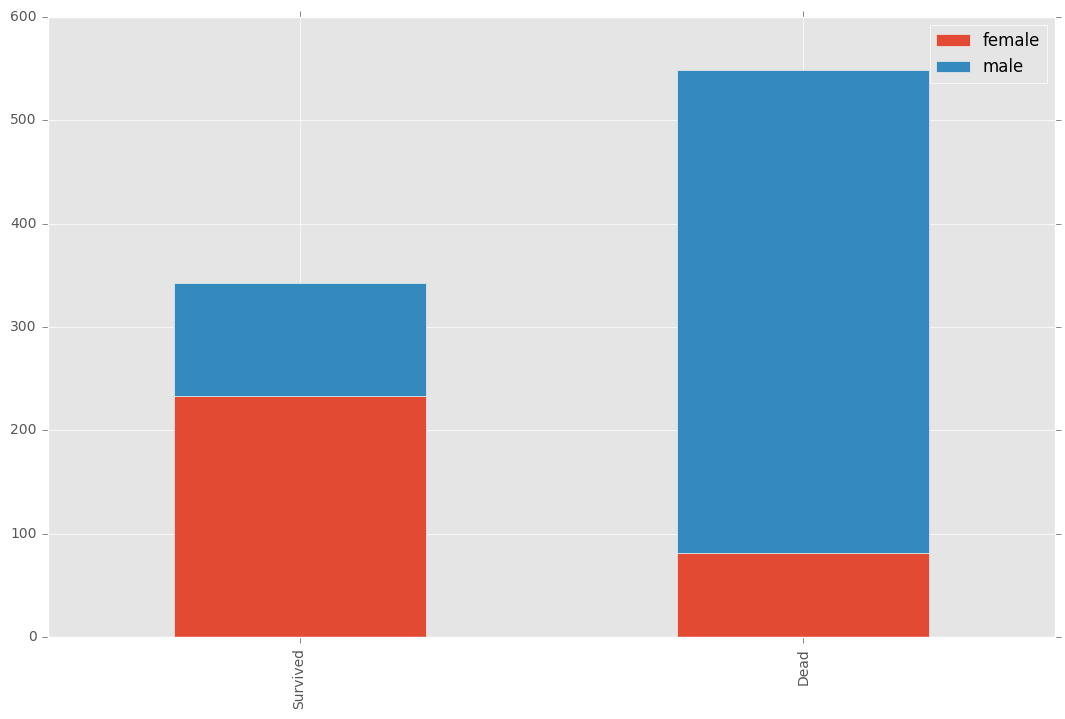

In [42]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

The Sex variable seems to be a decisive feature. Women are more likely to survivre.

Let's now correlate the survival with the age variable.

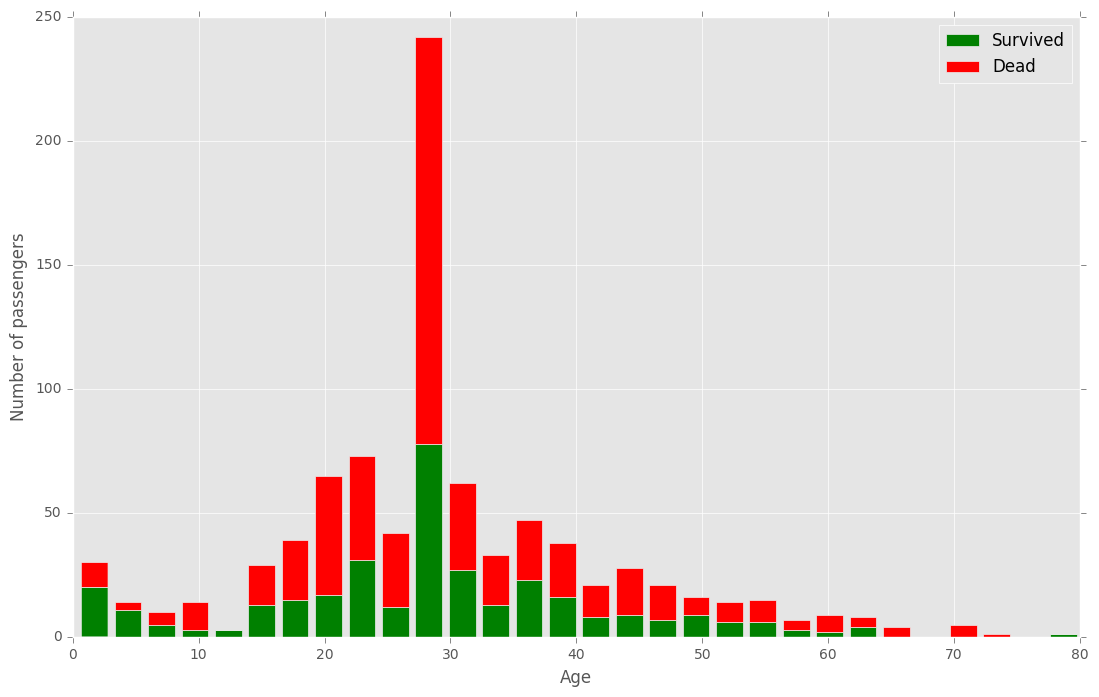

In [43]:
figure = plt.figure(figsize=(13,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

If you follow the chart bin by bin, you will notice that passengers who are less than 10 are more likely to survive than older ones who are more than 12 and less than 50. Older passengers seem to be rescued too.

These two first charts confirm that one old code of conduct that sailors and captains follow in case of threatening situations: <b>"Women and children first !"</b>.

Right?

Let's now focus on the Fare ticket of each passenger and correlate it with the survival. 

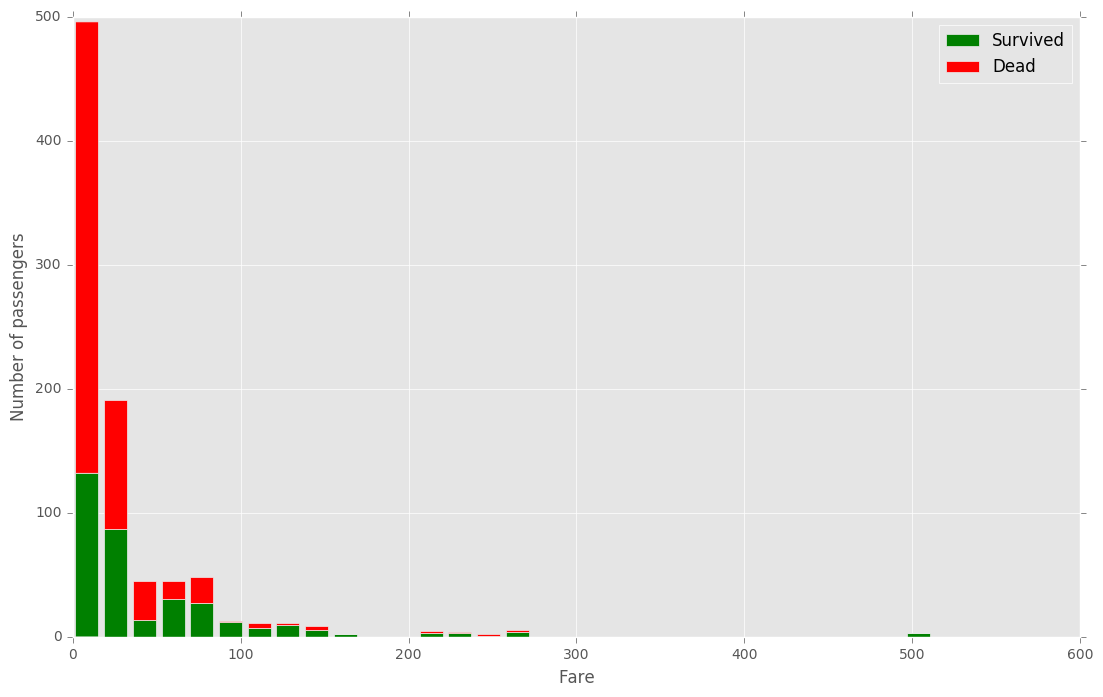

In [45]:
figure = plt.figure(figsize=(13,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Passengers with cheaper ticket fares are more likely to die. 
Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

Ok this is nice. Let's now combine the age, the fare and the survival on a single chart.

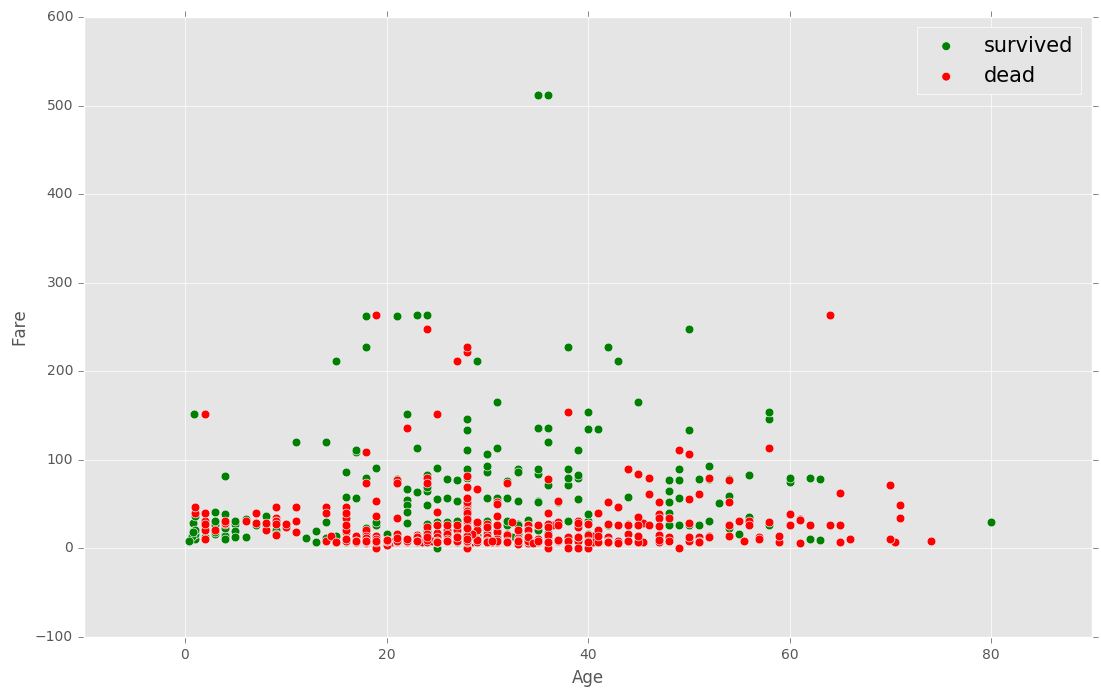

In [46]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

A distinct cluster of dead passengers appears on the chart. Those people are adults (age between 15 and 50) of lower class (lowest ticket fares).

In fact, the ticket fare correlates with the class as we see it in the chart below. 

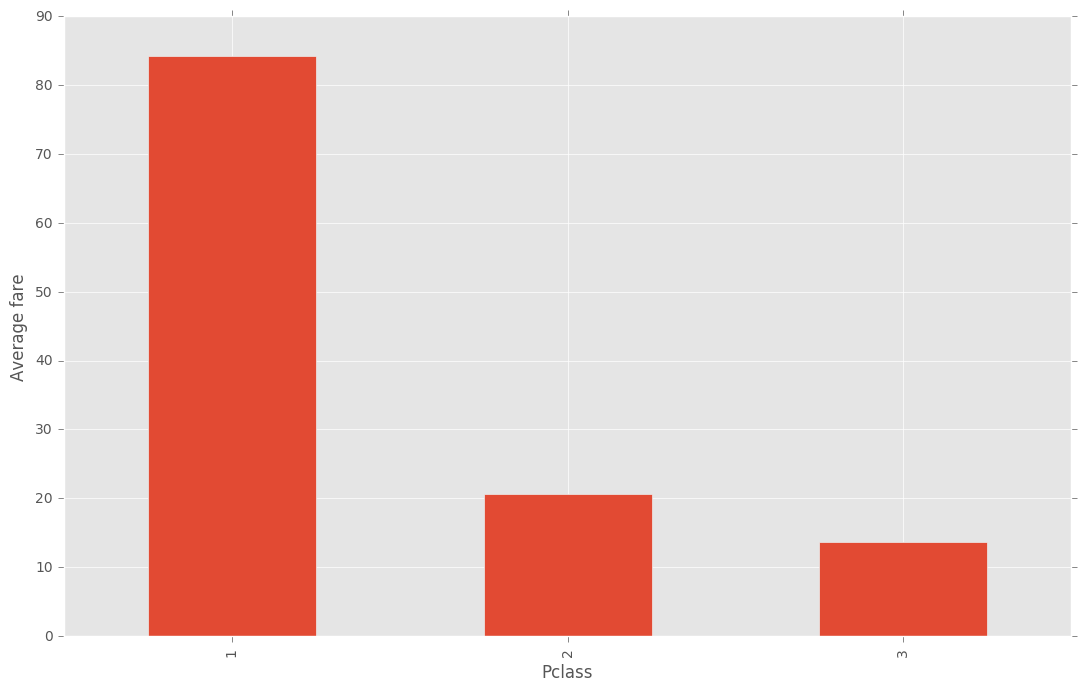

In [47]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(13,8), ax = ax)

Let's now see how the embarkation site affects the survival.

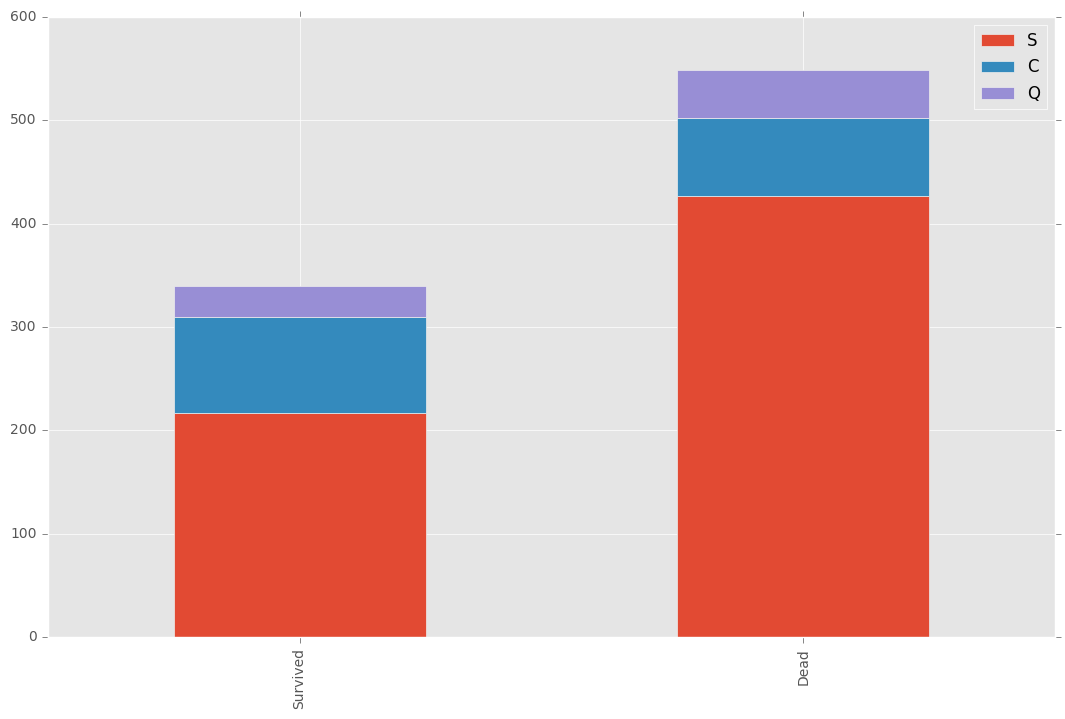

In [48]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

The seams to be no distinct correlation here.

# II - Feature engineering

In the previous part, we flirted with the data and spotted some interesting correlations. However, we couldn't manage to analyze more complicated features like the names or the tickets because these required further processing.  

In this part, we'll focus on the ways to transform these specific features in such a way they become easily fed to machine learning algorithms.

We'll also create, or "engineer" some other features that'll be useful in building the model.

We will break our code in separate functions for more clarity.

But first let's define a print function that asserts whether or not a feature has been processed. 

In [49]:
def status(feature):

    print 'Processing',feature,': ok'

###  Loading the data

One trick when starting a machine learning problem is to combine the training set and the test set together. 
This is useful especially when your test set appears to have a feature that doesn't exist in the training set. Therefore, if we don't combine the two sets, testing our model on the test set will fail.

Besides, combining the two sets will save the same work to do later on when testing.

The procedure is quite simple. 

We start by loading the train set and the test set.
We create an empty dataframe called <b>combined</b>. 
Then we append test to train and affect the result to <b>combined</b>.

In [50]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('../input/train.csv')
    
    # reading test data
    test = pd.read_csv('../input/test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [51]:
combined = get_combined_data()

Let's have a look at the shape :

In [52]:
combined.shape

(1309, 11)

train and test sets are combined.

You may notice that the total number of rows (1309) is the exact summation of the number of rows in the train set and the test set.

In [53]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting the passenger titles

When looking at the passenger names one could wonder how to process them to extract an easily interpretable information.

If you look closely at these first examples: 

- Braund, <b> Mr.</b> Owen Harris	
- Heikkinen, <b>Miss.</b> Laina
- Oliva y Ocana, <b>Dona.</b> Fermina
- Peter, <b>Master.</b> Michael J

You will notice that each name has a title in it ! This can be a simple Miss. or Mrs. but it can be sometimes something more sophisticated like Master, Sir or Dona. In that case, we might introduce additional information about the social status by simply parsing the name and extracting the title.

Let's see how we'll do that in the function below.

In [54]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

This function parses the names and extract the titles. Then, it maps the titles to categories of titles. 
We selected : 

- Officer
- Royalty 
- Mr
- Mrs
- Miss
- Master

Let's run it !

In [55]:
get_titles()

In [56]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Perfect. Now we have an additional column called <b>Title</b> that contains the information.

### Processing the ages

We have seen in the first part that the Age variable was missing 177 values. This is a large number ( ~ 13% of the dataset). Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers. 

To understand why, let's group our dataset by sex, Title and passenger class.

In [57]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.

For example: 

- If the passenger is female, from Pclass 1, and from royalty the median age is 39.
- If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.

Let's create a function that fills in the missing age in <b>combined</b> based on these different attributes.

In [58]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')

In [59]:
process_age()

Processing age : ok


In [60]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


Perfect. The missing ages have been replaced. 

However, we notice a missing value in Fare, two missing values in Embarked and a lot of missing values in Cabin. We'll come back to these variables later.

Let's now process the names.

In [61]:
def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')

This function drops the Name column since we won't be using it anymore because we created a Title column.

Then we encode the title values using a dummy encoding.

In [62]:
process_names()

Processing names : ok


In [63]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0


As you can see : 
- there is no longer a name feature. 
- new variables (Title_X) appeared. These features are binary. 
    - For example, If Title_Mr = 1, the corresponding Title is Mr.

### Processing Fare

In [64]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.Fare.mean(),inplace=True)
    
    status('fare')

This function simply replaces one missing Fare value by the mean.

In [65]:
process_fares()

Processing fare : ok


### Processing Embarked

In [66]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.Embarked.fillna('S',inplace=True)
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')

This functions replaces the two missing values of Embarked with the most frequent Embarked value.

In [67]:
process_embarked()

Processing embarked : ok


### Processing Cabin

In [68]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies],axis=1)
    
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')

This function replaces NaN values with U (for <i>Unknow</i>). It then maps each Cabin value to the first letter.
Then it encodes the cabin values using dummy encoding.

In [69]:
process_cabin()

Processing cabin : ok


In [70]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
Cabin_A          1309 non-null float64
Cabin_B          1309 non-null float64
Cabin_C          1309 non-null float64
Cabin_D          1309 non-null float64
Cabin_E          1309 non-null float64
Cabin_F          1309 non-null float64
Cabin_

Ok no missing values.

In [71]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,female,35.0,1,0,113803,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Processing Sex

In [72]:
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    
    status('sex')

This function maps the string values male and female to 1 and 0 respectively. 

In [73]:
process_sex()

Processing sex : ok


### Processing Pclass

In [74]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

This function encode the values of Pclass (1,2,3) using a dummy encoding.

In [75]:
process_pclass()

Processing pclass : ok


### Processing Ticket

In [76]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)

    status('ticket')

* This functions preprocess the tikets first by extracting the ticket prefix. When it fails in extracting a prefix it returns XXX. 
* Then it encodes prefixes using dummy encoding.

In [77]:
process_ticket()

Processing ticket : ok


### Processing Family

This part includes creating new variables based on the size of the family (the size is by the way, another variable we create).

In [78]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')

This function introduces 4 new features: 

- FamilySize : the total number of relatives including the passenger (him/her)self.
- Sigleton : a boolean variable that describes families of size = 1
- SmallFamily : a boolean variable that describes families of 2 <= size <= 4
- LargeFamily : a boolean variable that describes families of 5 < size

In [79]:
process_family()

Processing family : ok


In [80]:
combined.shape

(1309, 68)

We end up with a total of 68 features. 

In [81]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
1,2,0,38.0,1,0,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
3,4,0,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,1,0
4,5,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0


As you can see, the features range in different intervals. Let's normalize all of them in the unit interval. All of them except the PassengerId.

In [82]:
def scale_all_features():
    
    global combined
    
    features = list(combined.columns)
    features.remove('PassengerId')
    combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)
    
    print 'Features scaled successfully !'

In [83]:
scale_all_features()

Features scaled successfully !


# III - Modeling

In this part, we use our knowledge of the passengers based on the features we created and then build a statistical model. You can think of this model as a black box that crunches the information of any new passenger and decides whether or not he survives.

There is a wide variety of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests and gradient boosted trees.

We'll be using Random Forests. Random Froests has proven a great efficiency in Kaggle competitions.

For more details about why ensemble methods perform well, you can refer to these posts:

- http://mlwave.com/kaggle-ensembling-guide/
- http://www.overkillanalytics.net/more-is-always-better-the-power-of-simple-ensembles/

Back to our problem, we now have to:

1. Break the combined dataset in train set and test set.
2. Use the train set to build a predictive model.
3. Evaluate the model using the train set.
4. Test the model using the test set and generate and output file for the submission.

Keep in mind that we'll have to reiterate on 2. and 3. until a acceptable evaluation score is achieved.

Let's start by importing the useful libraries.

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

To evaluate our model we'll be using 5-fold cross validation with the Accuracy metric.

To do that, we'll define a small scoring function. 

In [85]:
def compute_score(clf, X, y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5,scoring=scoring)
    return np.mean(xval)

Recovering the train set and the test set from the combined dataset is an easy task.

In [86]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('../input/train.csv')
    
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train,test,targets

In [87]:
train,test,targets = recover_train_test_target()

## Feature selection

We've come up with 68 features so far. This number is quite large. 

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:

- It decreases redundancy among the data
- It speeds up the training process
- It reduces overfitting


Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

Let's have a look at the importance of each feature.

In [89]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [90]:
features.sort(['importance'],ascending=False)

,feature,importance
0,PassengerId,0.128346
2,Age,0.118156
5,Fare,0.112230
8,Title_Mr,0.106897
1,Sex,0.104775
9,Title_Mrs,0.041672
7,Title_Miss,0.041140
26,Pclass_3,0.033485
23,Cabin_U,0.028219
24,Pclass_1,0.024011


As you may notice, there is a great importance linked to Title_Mr, Age, Fare, and Sex. 

There is also an important correlation with the Passenger_Id.

Let's now transform our train set and test set in a more compact datasets. 

In [91]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891L, 15L)

In [95]:
test_new = model.transform(test)
test_new.shape

(418L, 15L)

Yay! Now we're down to 15 features.

### Hyperparameters tuning

As mentioned in the beginning of the Modeling part, we will be using a Random Forest model.

Random Forest are quite handy. They do however come with some parameters to tweak in order to get an optimal model for the prediction task.

To learn more about Random Forests, you can refer to this link: 
https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/


In [96]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.829405162738
Best parameters: {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 4}


Now that the model is built by scanning all several combinations of hyperparameters, we can generate an output file to submit on Kaggle.

This solution allowed me to get an accuracy score of 0.8134 on the public leaderboard.

In [97]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('../data/output.csv',index=False)

IOError: [Errno 2] No such file or directory: '../data/output.csv'

# IV - Conclusion

In this article, we explored an interesting dataset brought to us by <a href="http://kaggle.com">Kaggle</a>.

We went through the basic bricks of the pipeline:

- Data exploration and visualization: an initial step to formulate hypotheses
- Data cleaning 
- Feature engineering 
- Feature selection
- Hyperparameters tuning
- Submission

Lots of articles have been written about this challenge, so obviously there is a room for improvement.

Here is what I suggest for next steps:

- Dig more in the data and eventually build new features.
- Try different models : logistic regressions, Gradient Boosted trees, XGboost, ...
- Try ensemble learning techniques (stacking, blending)
- Maybe try other families of ML models (neural networks?)

I would be more than happy if you could find out a way to improve my solution. This could make me update the article and definitely give you credit for that. So feel free to post a comment or shoot me an email at ahmed.besbes@hotmail.com